In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv


In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.08 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 3#time是x1对x2影响的时间延迟
ts_length = 1000
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

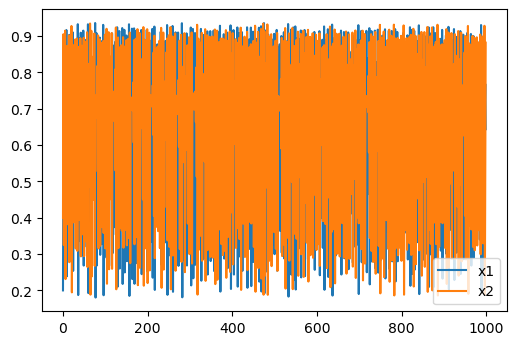

In [4]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [5]:
#array改为dataframe
x_1 = pd.DataFrame(x1,columns=['x_1'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_1.shape

(1000, 1)

In [6]:
x_2 = x_2.iloc[10:800,[0]]#原始数据
x_2 = x_2.reset_index(drop=True)#更改索引
x_2.columns=['x_2']#重命名列名
x_t = x_1.iloc[10:800,[0]]#原始数据
x_t = x_t.reset_index(drop=True)#更改索引
x_t.columns=['x_1']#重命名列名


x_t1 = x_1.iloc[9:799,[0]]
x_t1 = x_t1.reset_index(drop=True)#更改索引
x_t1.columns=['x_t1']#重命名列名

x_t2 = x_1.iloc[8:798,[0]]
x_t2 = x_t2.reset_index(drop=True)#更改索引
x_t2.columns=['x_t2']#重命名列名
x_t3 = x_1.iloc[7:797,[0]]
x_t3 = x_t3.reset_index(drop=True)#更改索引
x_t3.columns=['x_t3']#重命名列名
x_t4 = x_1.iloc[6:796,[0]]
x_t4 = x_t4.reset_index(drop=True)#更改索引
x_t4.columns=['x_t4']#重命名列名
x_t5 = x_1.iloc[5:795,[0]]
x_t5 = x_t5.reset_index(drop=True)#更改索引
x_t5.columns=['x_t5']#重命名列名
x_t6 = x_1.iloc[4:794,[0]]
x_t6 = x_t6.reset_index(drop=True)#更改索引
x_t6.columns=['x_t6']#重命名列名
x_t7 = x_1.iloc[3:793,[0]]
x_t7 = x_t7.reset_index(drop=True)#更改索引
x_t7.columns=['x_t7']#重命名列名
x_t8 = x_1.iloc[2:792,[0]]
x_t8 = x_t8.reset_index(drop=True)#更改索引
x_t8.columns=['x_t8']#重命名列名
x_t9 = x_1.iloc[1:791,[0]]
x_t9 = x_t9.reset_index(drop=True)#更改索引
x_t9.columns=['x_t9']#重命名列名
x_t10 = x_1.iloc[0:790,[0]]
x_t10 = x_t10.reset_index(drop=True)#更改索引
x_t10.columns=['x_t10']#重命名列名

data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
0,0.872586,0.676969,0.238662,0.916358,0.532366,0.825011,0.338734,0.889498,0.408160,0.869851,0.599200,0.200000
1,0.381984,0.785268,0.676969,0.238662,0.916358,0.532366,0.825011,0.338734,0.889498,0.408160,0.869851,0.599200
2,0.861989,0.616395,0.785268,0.676969,0.238662,0.916358,0.532366,0.825011,0.338734,0.889498,0.408160,0.869851
3,0.432035,0.856596,0.616395,0.785268,0.676969,0.238662,0.916358,0.532366,0.825011,0.338734,0.889498,0.408160
4,0.901688,0.438427,0.856596,0.616395,0.785268,0.676969,0.238662,0.916358,0.532366,0.825011,0.338734,0.889498
...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.889417,0.675999,0.750580,0.703345,0.744619,0.280066,0.910947,0.524180,0.819929,0.653293,0.224575,0.918795
786,0.317814,0.785825,0.675999,0.750580,0.703345,0.744619,0.280066,0.910947,0.524180,0.819929,0.653293,0.224575
787,0.799485,0.618708,0.785825,0.675999,0.750580,0.703345,0.744619,0.280066,0.910947,0.524180,0.819929,0.653293
788,0.556359,0.857109,0.618708,0.785825,0.675999,0.750580,0.703345,0.744619,0.280066,0.910947,0.524180,0.819929


In [7]:
# x_2 = x_2.iloc[0:80,[0]]#原始数据
# x_t = x_1.iloc[0:80,[0]]#原始数据
# x_t1 = x_1.iloc[1:81,[0]]
# x_t1 = x_t1.reset_index(drop=True)#更改索引
# x_t1.columns=['x_t1']#重命名列名

# x_t2 = x_1.iloc[2:82,[0]]
# x_t2 = x_t2.reset_index(drop=True)#更改索引
# x_t2.columns=['x_t2']#重命名列名
# x_t3 = x_1.iloc[3:83,[0]]
# x_t3 = x_t3.reset_index(drop=True)#更改索引
# x_t3.columns=['x_t3']#重命名列名
# x_t4 = x_1.iloc[4:84,[0]]
# x_t4 = x_t4.reset_index(drop=True)#更改索引
# x_t4.columns=['x_t4']#重命名列名
# x_t5 = x_1.iloc[5:85,[0]]
# x_t5 = x_t5.reset_index(drop=True)#更改索引
# x_t5.columns=['x_t5']#重命名列名
# x_t6 = x_1.iloc[6:86,[0]]
# x_t6 = x_t6.reset_index(drop=True)#更改索引
# x_t6.columns=['x_t6']#重命名列名
# x_t7 = x_1.iloc[7:87,[0]]
# x_t7 = x_t7.reset_index(drop=True)#更改索引
# x_t7.columns=['x_t7']#重命名列名
# x_t8 = x_1.iloc[8:88,[0]]
# x_t8 = x_t8.reset_index(drop=True)#更改索引
# x_t8.columns=['x_t8']#重命名列名
# x_t9 = x_1.iloc[9:89,[0]]
# x_t9 = x_t9.reset_index(drop=True)#更改索引
# x_t9.columns=['x_t9']#重命名列名
# x_t10 = x_1.iloc[10:90,[0]]
# x_t10 = x_t10.reset_index(drop=True)#更改索引
# x_t10.columns=['x_t10']#重命名列名

# data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
#                    x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

# data

相关性分析

In [8]:
#pearson相关系数
r = data.corr()
r

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.008906,0.015198,-0.011229,-0.008277,-0.018842,-0.011148,0.127204,-0.180352,0.220313,-0.230155,0.226661
x_1,-0.008906,1.000000,-0.681005,0.403551,-0.301153,0.169394,-0.042305,-0.019151,0.041911,-0.043930,0.014542,-0.012909
x_t1,0.015198,-0.681005,1.000000,-0.681362,0.403904,-0.301731,0.172279,-0.044156,-0.016339,0.040056,-0.045464,0.020552
x_t2,-0.011229,0.403551,-0.681362,1.000000,-0.681643,0.404173,-0.303527,0.173218,-0.046041,-0.015322,0.041743,-0.049833
x_t3,-0.008277,-0.301153,0.403904,-0.681643,1.000000,-0.681848,0.404540,-0.303924,0.173801,-0.046588,-0.015465,0.043139
x_t4,-0.018842,0.169394,-0.301731,0.404173,-0.681848,1.000000,-0.682430,0.404961,-0.304950,0.174349,-0.045576,-0.018389
x_t5,-0.011148,-0.042305,0.172279,-0.303527,0.404540,-0.682430,1.000000,-0.683177,0.406013,-0.306248,0.175073,-0.042187
x_t6,0.127204,-0.019151,-0.044156,0.173218,-0.303924,0.404961,-0.683177,1.000000,-0.683914,0.406674,-0.305891,0.171242
x_t7,-0.180352,0.041911,-0.016339,-0.046041,0.173801,-0.304950,0.406013,-0.683914,1.000000,-0.684594,0.407891,-0.302900
x_t8,0.220313,-0.043930,0.040056,-0.015322,-0.046588,0.174349,-0.306248,0.406674,-0.684594,1.000000,-0.684735,0.403842


In [9]:
#spearman秩相关
s = data.corr('spearman')
s

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.015583,0.020093,-0.009572,-0.002717,-0.016295,-0.017213,0.121370,-0.194925,0.233424,-0.245636,0.241321
x_1,-0.015583,1.000000,-0.766840,0.460179,-0.312349,0.174589,-0.045297,-0.026098,0.051323,-0.046230,0.023641,-0.012957
x_t1,0.020093,-0.766840,1.000000,-0.766839,0.460046,-0.312472,0.175869,-0.046726,-0.024259,0.049547,-0.047094,0.028716
x_t2,-0.009572,0.460179,-0.766839,1.000000,-0.766718,0.460177,-0.313519,0.177060,-0.048295,-0.022701,0.050355,-0.052059
x_t3,-0.002717,-0.312349,0.460046,-0.766718,1.000000,-0.766960,0.459613,-0.313119,0.177399,-0.048809,-0.022737,0.052457
x_t4,-0.016295,0.174589,-0.312472,0.460177,-0.766960,1.000000,-0.766247,0.459088,-0.313211,0.177674,-0.048683,-0.025213
x_t5,-0.017213,-0.045297,0.175869,-0.313519,0.459613,-0.766247,1.000000,-0.766676,0.458814,-0.313361,0.178569,-0.046264
x_t6,0.121370,-0.026098,-0.046726,0.177060,-0.313119,0.459088,-0.766676,1.000000,-0.766050,0.458748,-0.314071,0.175568
x_t7,-0.194925,0.051323,-0.024259,-0.048295,0.177399,-0.313211,0.458814,-0.766050,1.000000,-0.766638,0.460576,-0.312019
x_t8,0.233424,-0.046230,0.049547,-0.022701,-0.048809,0.177674,-0.313361,0.458748,-0.766638,1.000000,-0.767563,0.457542


In [10]:
#MIC最大信息系数
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

1.0000000000000002
0.17653432831929777
0.1613325622923219
0.166821820734098
0.17197482184734328
0.21449626008951533
0.22970941249757032
0.23198501620240672
0.20973359358827456
0.1922965039496511
0.19761022275563817
0.189293697696075


In [11]:
rx2 = r.x_2.reset_index(drop=True)#更改索引
rx2 = rx2.iloc[1:12]
rx2 = rx2.reset_index(drop=True)

sx2 = s.x_2.reset_index(drop=True)#更改索引
sx2 = sx2.iloc[1:12]
sx2 = sx2.reset_index(drop=True)

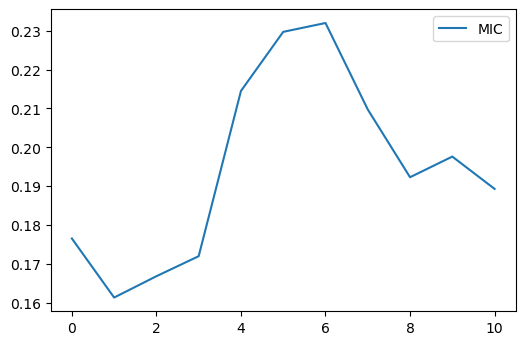

In [13]:
plt.figure(1,dpi=100)

# plt.plot(rx2,label = "r")
# plt.plot(sx2,label = "s")
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()

MIC_6s